### 3. Feature Selection-Information gain - mutual information In Regression Problem Statements

### Mutual Information
Estimate mutual information for a continuous target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances

Mutual information is calculated between two variables and measures the reduction in uncertainty for one variable given a known value of the other variable.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

`I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.`

To underderstand  Mutual Information you should have the understanding of below topics.<br><br>
Entropy: [Link](https://www.youtube.com/watch?v=1IQOtJ4NI_0)<br>
Information Gain: [Link](https://www.youtube.com/watch?v=FuTRucXB9rA)<br>
Gini Impurity: [Link](https://www.youtube.com/watch?v=5aIFgrrTqOw)<br>
Statistical test: [Link](https://www.youtube.com/watch?v=4-rxTA_5_xA)<br>
All about P Value, T test, Chi Sqaure Test, Anova Test and When to use What ? [Link](https://www.youtube.com/watch?v=YrhlQB3mQFI)

In [1]:
import pandas as pd
df = pd.read_csv(r"G:\Udemy\DATA SCIENCE ineuron\Resources\Dataset\House Prices- Advance Regression Techniques.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

As we can see there are 80 features and some are categorical features and some are numerical features . and "SalePrice" is the Target feature <br>

There are so many feature so we will not do preprocessing . We just extract the numerical features and learn how to do feature selection

In [3]:
numerical_features = [col for col in df.columns if df[col].dtype != "O"]
len(numerical_features)

38

### We are taking numerical columns only for feature scaling

In [7]:
housing_df = df[numerical_features]
print(f"This datatype has {housing_df.shape[0]} rows and {housing_df.shape[1]} columns ")
housing_df.head()

This datatype has 1460 rows and 38 columns 


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [8]:
# Droping the "Id" Feature
housing_df = housing_df.drop("Id",axis = 1)
housing_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


### Train Test Split

In [10]:
# Perfrom Train Test Split to avoid overfitting
X = housing_df.drop("SalePrice",axis = 1)
y = housing_df['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [11]:
X_train.shape,y_train.shape

((1022, 36), (1022,))

### Check the null values

In [13]:
null_val = X_train.isnull().sum()
null_val[null_val !=0]

LotFrontage    189
MasVnrArea       5
GarageYrBlt     54
dtype: int64

These 3 features have null values

In [14]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information

mutual_info = mutual_info_regression(X_train.fillna(0),y_train)
mutual_info


array([0.25571252, 0.20581021, 0.16753036, 0.54166009, 0.10647355,
       0.3475491 , 0.24165023, 0.09752188, 0.16199007, 0.00153705,
       0.11487725, 0.38660313, 0.31275635, 0.23103212, 0.0028626 ,
       0.4802191 , 0.01942211, 0.        , 0.27421033, 0.09120513,
       0.04010092, 0.02061654, 0.18993075, 0.17882275, 0.26511158,
       0.37825574, 0.36531896, 0.06730062, 0.17580163, 0.01528434,
       0.        , 0.00989195, 0.00146767, 0.        , 0.        ,
       0.00540786])

In [19]:
mutual_info = pd.Series(mutual_info).sort_values(ascending= False)
mutual_info.index = X_train.columns
mutual_info

MSSubClass       0.541660
LotFrontage      0.480219
LotArea          0.386603
OverallQual      0.378256
OverallCond      0.365319
YearBuilt        0.347549
YearRemodAdd     0.312756
MasVnrArea       0.274210
BsmtFinSF1       0.265112
BsmtFinSF2       0.255713
BsmtUnfSF        0.241650
TotalBsmtSF      0.231032
1stFlrSF         0.205810
2ndFlrSF         0.189931
LowQualFinSF     0.178823
GrLivArea        0.175802
BsmtFullBath     0.167530
BsmtHalfBath     0.161990
FullBath         0.114877
HalfBath         0.106474
BedroomAbvGr     0.097522
KitchenAbvGr     0.091205
TotRmsAbvGrd     0.067301
Fireplaces       0.040101
GarageYrBlt      0.020617
GarageCars       0.019422
GarageArea       0.015284
WoodDeckSF       0.009892
OpenPorchSF      0.005408
EnclosedPorch    0.002863
3SsnPorch        0.001537
ScreenPorch      0.001468
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
dtype: float64

- Here `MSSubClass` featue have the highest value 0.5416660
- That means the output feature is 54% percentage dependent on the `MSSubClass`
- The Higher value of feature means higher dependency, So which ever feature has higher value, our prediction will be more dependent on that feature

<AxesSubplot:>

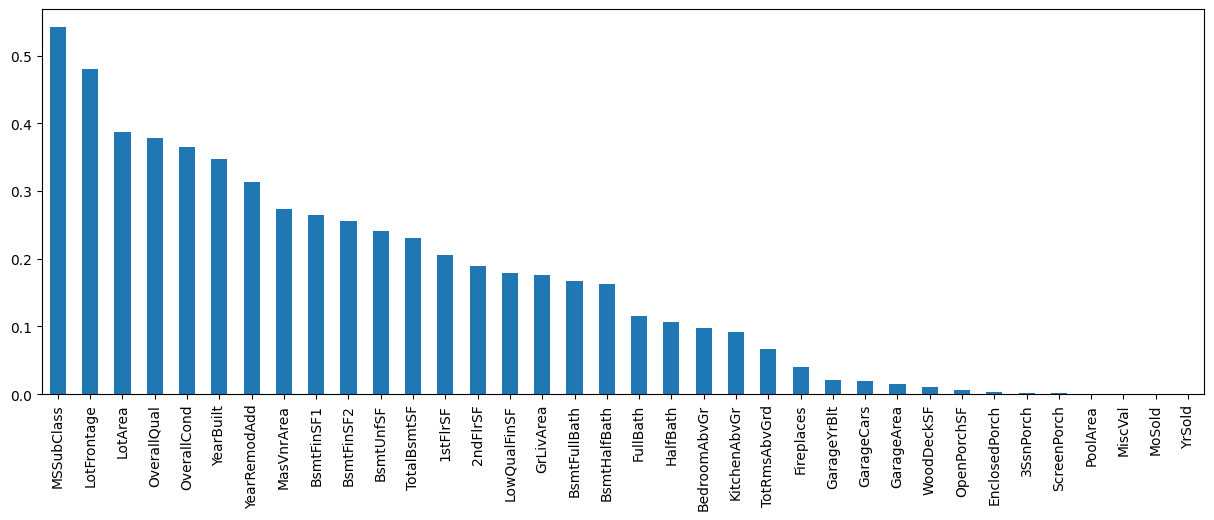

In [30]:
mutual_info.plot.bar(figsize = (15,5))

### Select Top 20 best features using `SelectPercentile`
SelectPercentile For mutual_info_regression<br>
SelectKBest For mutual_info_classifier

In [34]:
# Select the TOP 20 Percentiles
from sklearn.feature_selection import SelectPercentile
sel_top_cols = SelectPercentile(mutual_info_regression, percentile= 20)
sel_top_cols.fit(X_train.fillna(0),y_train)
X_train.columns[sel_top_cols.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

- Here we are getting the features that belong to Top 20 percentile


### Difference Between Information Gain And Mutual Information
I(X ; Y) = H(X) – H(X | Y) and IG(S, a) = H(S) – H(S | a)<br>

As such, mutual information is sometimes used as a synonym for information gain. Technically, they calculate the same quantity if applied to the same data.